**RIZKI** **PUTRA** **RAMADHAN**

**09011182126024**

# BAB 1 - Eksplorasi dan Pemahaman Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/My Drive/Prak ML/signal_metrics.csv'

In [ ]:
import pandas as pd

# Specify the path to the CSV file in your Google Drive
path = '/content/gdrive/My Drive/Prak ML/signal_metrics.csv'

# Read the CSV file using pandas
df = pd.read_csv(path)

## 1.1 Datasets Mentah dari Kaggle

In [ ]:
df.head()

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467


In [ ]:
df.columns

Index(['Timestamp', 'Locality', 'Latitude', 'Longitude',
       'Signal Strength (dBm)', 'Signal Quality (%)', 'Data Throughput (Mbps)',
       'Latency (ms)', 'Network Type', 'BB60C Measurement (dBm)',
       'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)'],
      dtype='object')

Pada data ini Variabel yang saya ambil adalah Locality, Latitude, Longitude, Signal Strengh (dBM), Data Throughput (Mbps), Latency (ms), dan Network Type.

Penjelasan Tiap Variabel :

*   Lintang dan Bujur: Koordinat lintang dan bujur mengindikasikan lokasi pengukuran di Bihar. Dataset mencakup 20 lokalitas yang ditentukan di Bihar, termasuk Kankarbagh, Rajendra Nagar, Boring Road, Ashok Rajpath, Danapur, Anandpuri, Bailey Road, Gardanibagh, Patliputra Colony, Phulwari Sharif, Exhibition Road, Pataliputra, Fraser Road, Kidwaipuri, Gandhi Maidan, S.K. Puri, Anisabad, Boring Canal Road, Bankipore, dan Kumhrar.

*   Locality: Lokal atau sebuah daerah yang termasuk dalam lingkup kota Bihar. Misalnya, Anandpuri, Bailey Road, Gardanibagh, Patliputra Colony, Phulwari Sharif, Exhibition Road, Pataliputra.

*   Kekuatan Sinyal (dBm): Kekuatan sinyal mewakili daya sinyal yang diterima dalam desibel (dBm) untuk berbagai jenis jaringan (3G, 4G, 5G, dan LTE).

*   Throughput Data (Mbps): Throughput data mewakili kapasitas jaringan untuk mentransmisikan data, diukur dalam megabit per detik (Mbps). Berbagai jenis jaringan memiliki nilai throughput data yang bervariasi.

*   Latensi (ms): Latensi merujuk pada keterlambatan waktu antara transmisi dan penerimaan paket data, diukur dalam milidetik (ms). Berbagai jenis jaringan memiliki nilai latensi yang berbeda, dihasilkan menggunakan distribusi seragam acak dalam rentang yang sesuai.

*   Jenis Jaringan: Jenis jaringan mengindikasikan teknologi yang digunakan untuk transmisi data, seperti 3G, 4G, 5G, atau LTE.



## 1.2 Eksplorasi Datasets


In [ ]:
df.shape

(16829, 12)

In [ ]:
df["Timestamp"].isna().sum()

0

Ini digunakan untuk mengecek apakah ada data yang hilang atau Missing Values pada Timestamps, agar kita dapat mengetahui Kapan dan Berapa Lama Datasets ini diperoleh.

In [ ]:
print("Earliest timestamp registered in the dataset is:", df["Timestamp"].min())
print("Latest timestamp registered in the dataset is:", df["Timestamp"].max())

Earliest timestamp registered in the dataset is: 2023-05-05 12:50:40.000000
Latest timestamp registered in the dataset is: 2023-06-10 23:56:52.791244


Disini kita hanya menampilkan Timestamp atau awal mula project data ini dijalankan dan terakhir dijalankan. Untuk mengetahui kapan Datasets ini dibuat dan ditest.

Setelah itu kita menghitung Beberapa Hari pengambilan data ini berjalan.

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

print("Range of time is:", df["Timestamp"].max() - df["Timestamp"].min())

Range of time is: 36 days 11:06:12.791244


In [ ]:
# Menghapus Kolom
kolom_yang_akan_dihapus = ['BB60C Measurement (dBm)',
       'srsRAN Measurement (dBm)', 'BladeRFxA9 Measurement (dBm)']
df = df.drop(kolom_yang_akan_dihapus, axis=1)

In [ ]:
df.dtypes

Timestamp                 datetime64[ns]
Locality                          object
Latitude                         float64
Longitude                        float64
Signal Strength (dBm)            float64
Signal Quality (%)               float64
Data Throughput (Mbps)           float64
Latency (ms)                     float64
Network Type                      object
dtype: object

Variabel yang tersisa dan yang akan digunakan

## 1.3 Eksplorasi tiap variabel yang akan Kita gunakan

### 1.3.1 Locality

In [ ]:
#Value counts of the locality column
df["Locality"].value_counts()

Locality
Fraser Road          897
Gandhi Maidan        885
Phulwari Sharif      880
Exhibition Road      876
Kidwaipuri           873
Boring Road          851
Pataliputra          850
Gardanibagh          846
Boring Canal Road    841
Kumhrar              840
Kankarbagh           834
Ashok Rajpath        832
Bailey Road          831
Anisabad             830
Bankipore            825
Rajendra Nagar       817
Patliputra Colony    811
Danapur              809
S.K. Puri            802
Anandpuri            799
Name: count, dtype: int64

Terdapat 20 Locality atau Daerah yang ada, nah nanti dari setiap Lokal ini kita akan tentukan mana Lokal yang masih tergolong rendah untuk QoS nya. Setelah itu baru kita bisa melakukan pemetaan atau menyarankan infrastrktur baru di Lokal tersebut.

In [ ]:
#checking for any missing values in this column
print("Number of missing values in the Locality:", df["Locality"].isna().sum())

Number of missing values in the Locality: 0


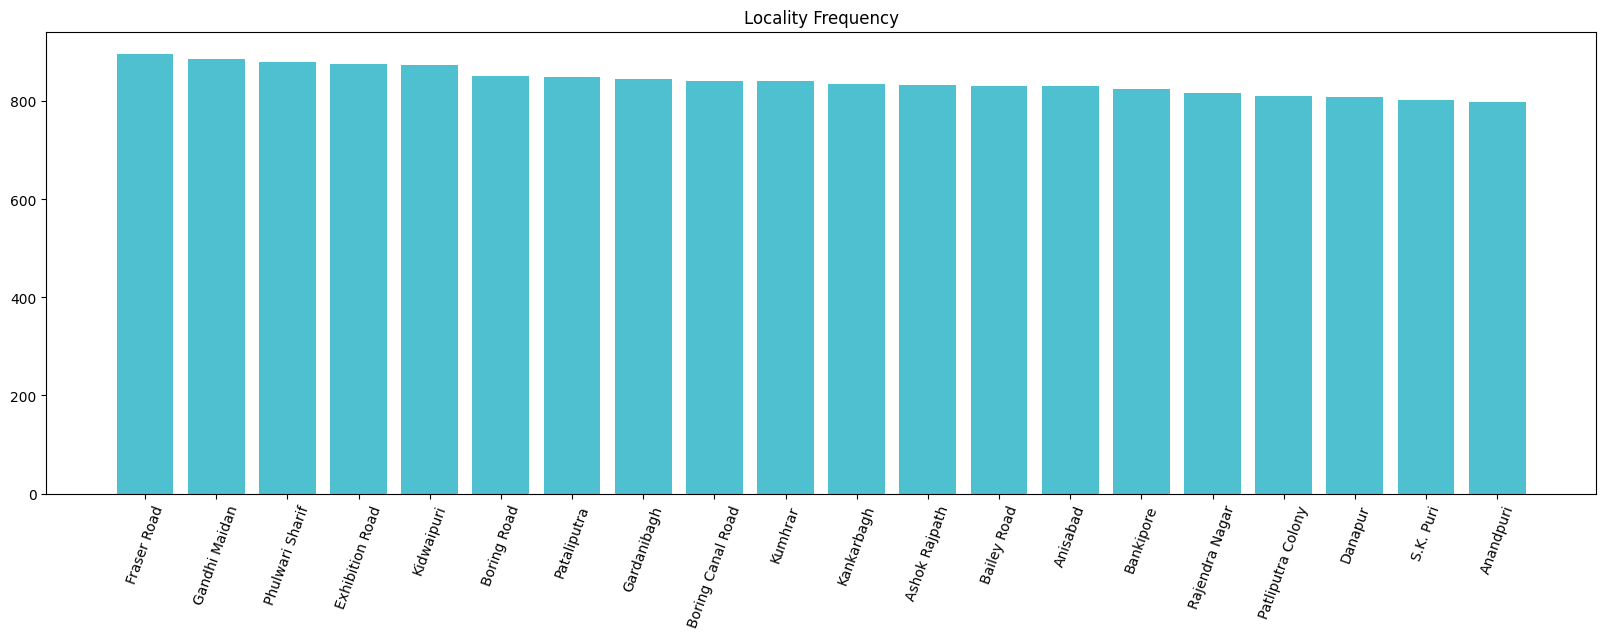

In [ ]:
import matplotlib.pyplot as plt

region_counts = df["Locality"].value_counts()

plt.figure(figsize=(20, 6))
plt.bar(region_counts.index, region_counts.values, color="#4FC0D0")
plt.xticks(region_counts.index, rotation=70)
plt.title("Locality Frequency")

plt.show()

Membuat diagram batang yang menunjukkan sebaran frekuensi nilai-nilai dalam kolom "Locality" dari DataFrame (df). Setelah menghitung jumlah masing-masing nilai unik, kode membuat dan menampilkan diagram batang dengan label yang sesuai. Tujuannya adalah memvisualisasikan sebaran frekuensi lokalitas secara grafis.

20 wilayah di Bihar semuanya hampir sama terwakili, dengan Fraser Road sebagai wilayah yang paling banyak terwakili dan Anandpuri sebagai wilayah yang paling sedikit terwakili dengan perbedaan jumlah keterwakilan yang rendah di antara keduanya.

Catatan :

*   Tidak ada nilai yang hilang dalam kolom Lokalitas.
*   20 wilayah di Bihar terwakili.
*   Wilayah yang paling banyak terwakili adalah "Fraser Road".
*   Wilayah yang paling sedikit terwakili adalah "Anandpuri".
*   Investigasi dilakukan pada "Boring Road" dan "Boring Canal Road" untuk memeriksa apakah keduanya merujuk ke wilayah yang sama. Namun, kedua wilayah tersebut ternyata berbeda sehingga tidak digabungkan.
*   Semua wilayah dianggap terwakili dengan merata, dengan perbedaan sebanyak 102 poin frekuensi antara wilayah yang paling sedikit terwakili (frekuensi 799) dan wilayah yang paling banyak terwakili (897).

### 1.3.2 Langitude dan Latitude

In [ ]:
print("Number of missing values in the latitude:",df["Latitude"].isna().sum())
print("Number of missing values in the longitude:", df["Longitude"].isna().sum())

Number of missing values in the latitude: 0
Number of missing values in the longitude: 0


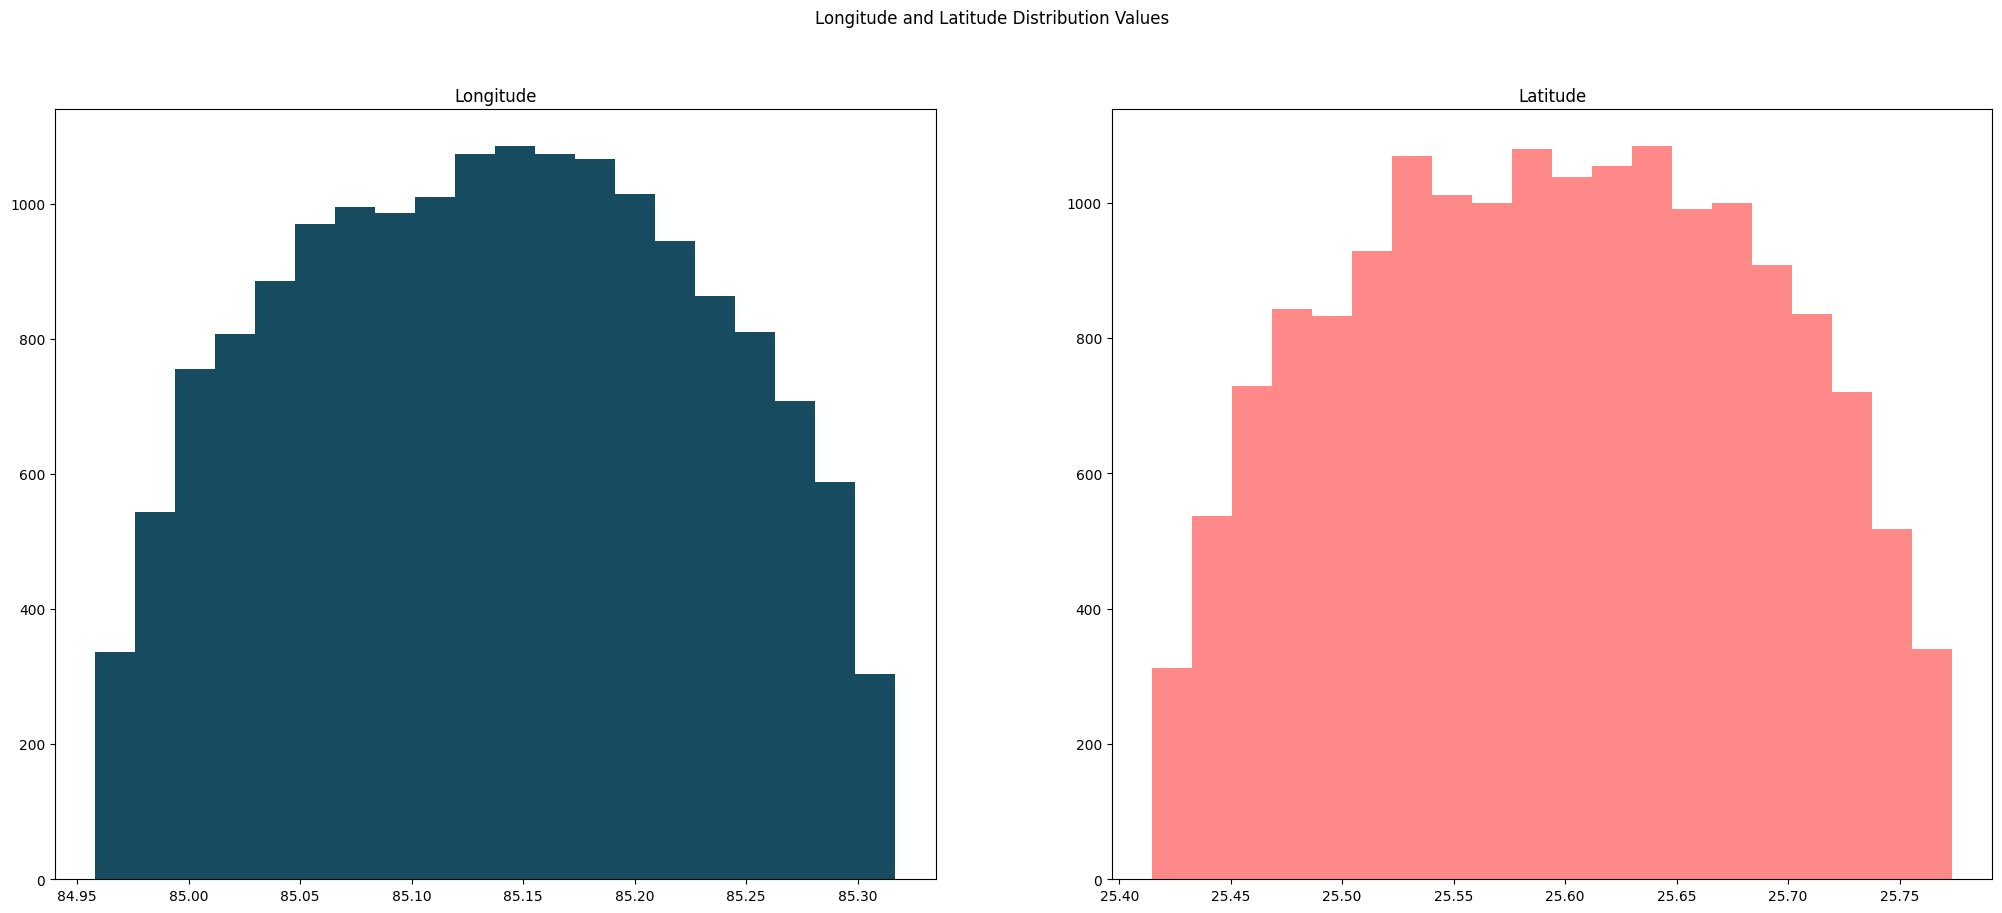

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

axes[0].hist(df["Longitude"], bins=20, color="#164B60")
axes[0].set_title("Longitude")

axes[1].hist(df["Latitude"], bins=20, color="#FF8989")
axes[1].set_title("Latitude")

plt.suptitle("Longitude and Latitude Distribution Values")
plt.show()

Membuat subplot dengan dua histogram yang menggambarkan distribusi nilai "Longitude" dan "Latitude" dari DataFrame (df).



*   plt.subplots(1, 2, figsize=(25, 10)) membuat satu baris dengan dua subplot, dengan ukuran total figur 25x10.

* axes[0].hist(df["Longitude"], bins=20, color="#164B60") membuat histogram pertama untuk "Longitude" dengan 20 bins dan warna tertentu.

* axes[1].hist(df["Latitude"], bins=20, color="#FF8989") membuat histogram kedua untuk "Latitude" dengan konfigurasi serupa.

* plt.suptitle("Longitude and Latitude Distribution Values") menambahkan judul keseluruhan untuk subplot.

* plt.show() menampilkan subplot yang telah dibuat.

Tujuannya adalah memvisualisasikan distribusi nilai "Longitude" dan "Latitude" secara grafis melalui histogram untuk mendapatkan wawasan tentang sebaran data spasial.

In [ ]:
print('Min Longitude:', df["Longitude"].min())
print('Max Longitude:', df["Longitude"].max())
print('Min Latitude:', df["Latitude"].min())
print('Max Latitude:', df["Latitude"].max())

Min Longitude: 84.95793630176554
Max Longitude: 85.31699355512761
Min Latitude: 25.414574976723216
Max Latitude: 25.77364847780419


Mencetak nilai minimum dan maksimum dari kolom "Longitude" dan "Latitude" dalam DataFrame (df).

* df["Longitude"].min() menghasilkan nilai minimum dari kolom "Longitude".
* df["Longitude"].max() menghasilkan nilai maksimum dari kolom "Longitude".
* df["Latitude"].min() menghasilkan nilai minimum dari kolom "Latitude".
* df["Latitude"].max() menghasilkan nilai maksimum dari kolom "Latitude".

Tujuan dari kode ini adalah memberikan informasi tentang rentang nilai (minimum dan maksimum) dari kedua kolom tersebut dalam dataset.

Catatan :

*   Tidak ada nilai yang hilang baik dalam kolom Longitude maupun Latitude.
*   Nilai-nilai longitude dan latitude berada dalam rentang wilayah Bihar. Setelah pemeriksaan, kedua nilai tersebut valid untuk wilayah Bihar dan termasuk dalam rentang latitude dan longitude Bihar.
*   Tidak ada nilai yang abnormal atau outlier yang terdeteksi dalam kedua kolom ini.

Saya juga sudah memetakan secara sederhana Data Titik Koordinat yang diperoleh dan akan saya Tampilkan di bawah :

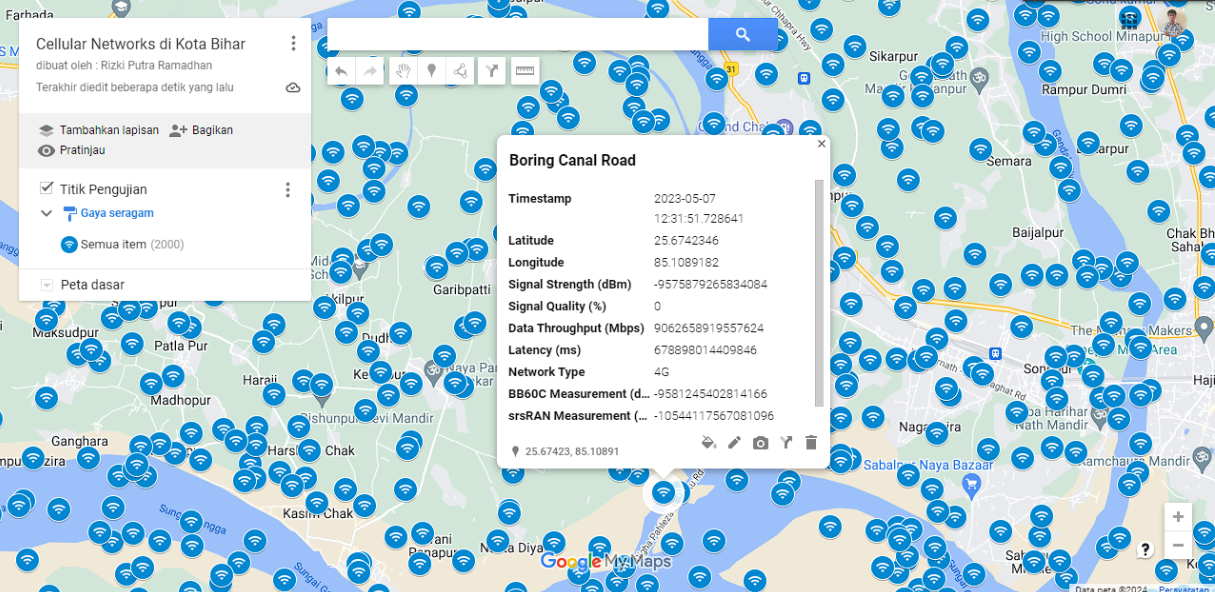

### 1.3.3. Signal Strength (dBm)

In [ ]:
print("Number of missing values in the signal strength:", df["Signal Strength (dBm)"].isna().sum())

Number of missing values in the signal strength: 0


In [ ]:
print("Minimum Signal Strength:",df["Signal Strength (dBm)"].min())
print("Maximum Signal Strength:", df["Signal Strength (dBm)"].max())
print("Mean Signal Strength:", df["Signal Strength (dBm)"].mean())

Minimum Signal Strength: -116.94226674903167
Maximum Signal Strength: -74.6448479734431
Mean Signal Strength: -90.07248449577469


Mencetak nilai minimum, maksimum, dan rata-rata dari kolom "Signal Strength (dBm)" dalam DataFrame (df).

* df["Signal Strength (dBm)"].min() menghasilkan nilai minimum dari kolom "Signal Strength (dBm)".
* df["Signal Strength (dBm)"].max() menghasilkan nilai maksimum dari kolom "Signal Strength (dBm)".
* df["Signal Strength (dBm)"].mean() menghasilkan nilai rata-rata dari kolom "Signal Strength (dBm)".

Tujuan dari kode ini adalah memberikan informasi mengenai karakteristik dasar dari data sinyal kekuatan, termasuk nilai minimum, maksimum, dan rata-rata dari kolom tersebut dalam dataset.

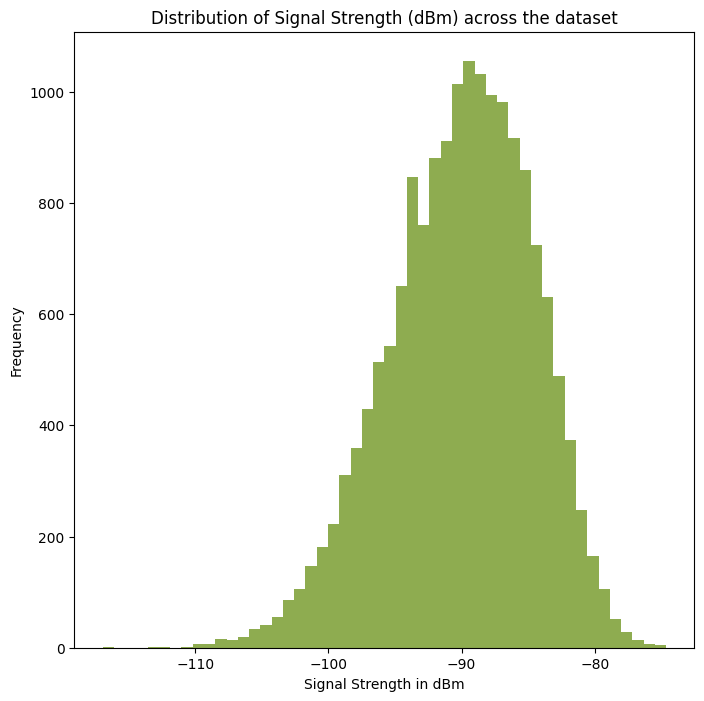

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.hist(df["Signal Strength (dBm)"], bins=50, color="#8EAC50")
plt.xlabel("Signal Strength in dBm")
plt.ylabel("Frequency")
plt.title("Distribution of Signal Strength (dBm) across the dataset")
plt.show()

Membuat histogram yang menggambarkan distribusi sinyal kekuatan dalam kolom "Signal Strength (dBm)" dari DataFrame (df).

* plt.figure(figsize=(8,8)) membuat sebuah figur dengan ukuran 8x8 unit.
* plt.hist(df["Signal Strength (dBm)"], bins=50, color="#8EAC50") menghasilkan histogram dari kolom "Signal Strength (dBm)" dengan 50 bins dan warna tertentu.
* plt.xlabel("Signal Strength in dBm") menambahkan label sumbu x.
* plt.ylabel("Frequency") menambahkan label sumbu y.
* plt.title("Distribution of Signal Strength (dBm) across the dataset") menambahkan judul untuk histogram.
* plt.show() menampilkan histogram yang telah dibuat.

Tujuannya adalah memberikan visualisasi terhadap sebaran frekuensi sinyal kekuatan dalam kolom tersebut, memberikan pemahaman lebih lanjut tentang distribusi nilai sinyal dalam dataset.

### 1.3.4. Data Throughput (Mbps)

In [ ]:
print("Number of missing values in the Data Throughput:", df["Data Throughput (Mbps)"].isna().sum())

Number of missing values in the Data Throughput: 0


In [ ]:
print("The minimum recorded data throughput is:", df["Data Throughput (Mbps)"].min())
print("The maximum recorded data throughput is:", df["Data Throughput (Mbps)"].max())
print("The mean data throughput recorded is:", df["Data Throughput (Mbps)"].mean())
print("The range of data throughputs recorded is:", df["Data Throughput (Mbps)"].max()-df["Data Throughput (Mbps)"].min())

The minimum recorded data throughput is: 1.0004232856506867
The maximum recorded data throughput is: 99.9858309888009
The mean data throughput recorded is: 16.182855613636214
The range of data throughputs recorded is: 98.98540770315022


mencetak statistik deskriptif untuk kolom "Data Throughput (Mbps)" pada DataFrame Anda (df):

*   df["Data Throughput (Mbps)"].min() mencetak nilai
minimum dari data throughput yang tercatat.
*   df["Data Throughput (Mbps)"].max() mencetak nilai maksimum dari data throughput yang tercatat.
*   df["Data Throughput (Mbps)"].mean() mencetak nilai rata-rata dari data throughput.
*   df["Data Throughput (Mbps)"].max() - df["Data Throughput (Mbps)"].min() mencetak rentang dari data throughput yang tercatat (perbedaan antara nilai maksimum dan minimum).

Pernyataan ini memberikan informasi dasar tentang karakteristik nilai data throughput dalam dataset Anda, termasuk sebaran dan kecenderungan pusat.

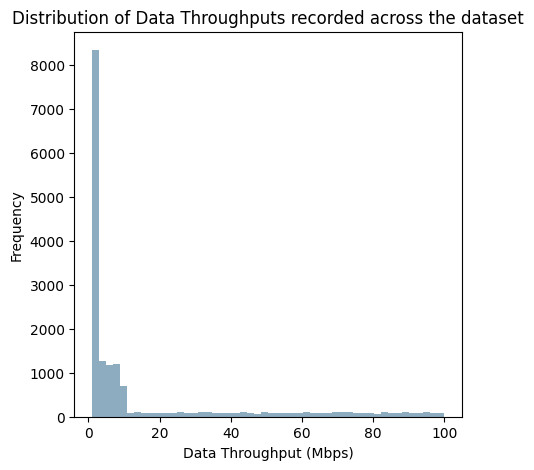

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(df["Data Throughput (Mbps)"], bins=50, color="#8EACC0")
plt.xlabel("Data Throughput (Mbps)")
plt.ylabel("Frequency")
plt.title("Distribution of Data Throughputs recorded across the dataset")
plt.show()

membuat histogram yang menggambarkan distribusi data throughput dalam kolom "Data Throughput (Mbps)" dari DataFrame (df).

*  plt.figure(figsize=(5,5)) membuat sebuah figur dengan ukuran 5x5 unit.
*  plt.hist(df["Data Throughput (Mbps)"], bins=50, color="#8EACC0") menghasilkan histogram dari kolom "Data Throughput (Mbps)" dengan 50 bins dan warna tertentu.
*  plt.xlabel("Data Throughput (Mbps)") menambahkan label sumbu x.
*  plt.ylabel("Frequency") menambahkan label sumbu y.
*  plt.title("Distribution of Data Throughputs recorded across the dataset") menambahkan judul untuk histogram.
*  plt.show() menampilkan histogram yang telah dibuat.

Tujuannya adalah memberikan visualisasi terhadap sebaran frekuensi data throughput dalam kolom tersebut, memberikan pemahaman lebih lanjut tentang distribusi nilai data throughput dalam dataset.

Catatan :

*   Tidak ada nilai yang hilang dalam kolom ini pada dataset.
*   Data throughput terendah yang tercatat adalah 1 Mbps, dan data throughput tertinggi yang tercatat adalah 99.98 Mbps.
*   Tidak ada data yang abnormal yang tercatat dalam kolom ini.
*   Data throughput yang lebih rendah memiliki frekuensi yang paling tinggi dalam dataset. Demikian pula, semakin tinggi data throughput, semakin rendah frekuensinya dalam dataset ini.

### 1.3.5. Latency (ms)

In [ ]:
print("Number of missing values in the Latency:",df["Latency (ms)"].isna().sum())

Number of missing values in the Latency: 0


In [ ]:
print("The maximum latency recorded is:", df["Latency (ms)"].max())
print("The minimum latency recorded is:", df["Latency (ms)"].min())
print("The mean latency recorded is:", df["Latency (ms)"].mean())
print("The range of the latency is:", df["Latency (ms)"].max()-df["Latency (ms)"].min())

The maximum latency recorded is: 199.99108068397217
The minimum latency recorded is: 10.019527462771013
The mean latency recorded is: 101.31362410968256
The range of the latency is: 189.97155322120116


Berikut adalah hasil perhitungan dan pencetakan statistik deskriptif untuk kolom "Latency (ms)" dalam DataFrame Anda (df):

*   df["Latency (ms)"].max() mencetak latency maksimum yang tercatat.
*   df["Latency (ms)"].min() mencetak latency minimum yang tercatat.
*   df["Latency (ms)"].mean() mencetak rata-rata (mean) latency yang tercatat.
*   df["Latency (ms)"].max() - df["Latency (ms)"].min() mencetak rentang latency (perbedaan antara nilai maksimum dan minimum).

Pernyataan-pernyataan ini memberikan wawasan tentang karakteristik dasar dari nilai-nilai latency dalam dataset Anda, termasuk sebaran dan kecenderungan pusat.

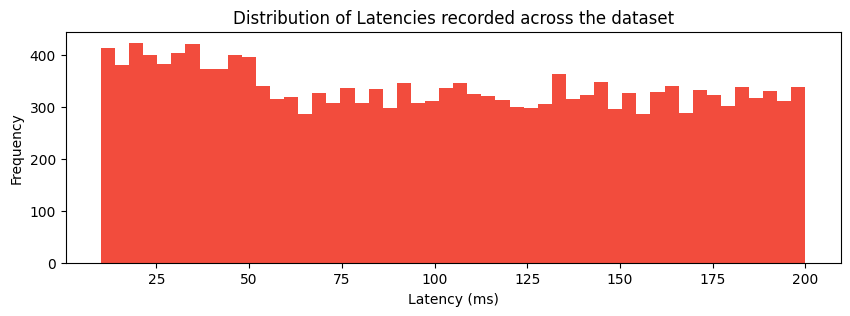

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(df["Latency (ms)"], bins=50, color="#F24C3D")
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.title("Distribution of Latencies recorded across the dataset")
plt.show()

Membuat histogram yang menggambarkan distribusi latency dalam kolom "Latency (ms)" dari DataFrame (df).

*   plt.figure(figsize=(10,3)) membuat sebuah figur dengan ukuran 10x3 unit.
*   plt.hist(df["Latency (ms)"], bins=50, color="#F24C3D") menghasilkan histogram dari kolom "Latency (ms)" dengan 50 bins dan warna tertentu.
*   plt.xlabel("Latency (ms)") menambahkan label sumbu x.
*   plt.ylabel("Frequency") menambahkan label sumbu y.
*   plt.title("Distribution of Latencies recorded across the dataset") menambahkan judul untuk histogram.
*   plt.show() menampilkan histogram yang telah dibuat.

Tujuannya adalah memberikan visualisasi terhadap sebaran frekuensi latency dalam kolom tersebut, memberikan pemahaman lebih lanjut tentang distribusi nilai latency dalam dataset.

Catatan :

*   Tidak ada nilai yang hilang dalam kolom ini pada dataset.
*   Latency minimum adalah 10 ms dan latency tertinggi adalah 200 ms.
*   Rata-rata latency adalah 101.3 ms dan rentang latensi adalah 189 ms.
*   Sebagian besar latensi terwakili secara merata, di mana tidak ada latensi khusus atau rentang latensi yang sangat diungkapkan.

### 1.3.6. Network Types

In [ ]:
print("Number of missing values in the Network Types:",df["Network Type"].isna().sum())

Number of missing values in the Network Types: 0


In [ ]:
network_types=df["Network Type"].value_counts()
network_types

Network Type
LTE    4224
4G     4219
3G     4208
5G     4178
Name: count, dtype: int64

In [ ]:
import plotly.express as px
fig = px.pie(df, values=network_types.values, names=network_types.index)
fig.update_layout(
    width=400,
    height=400,
    margin=dict(l=0, r=0, t=0, b=0),
    plot_bgcolor="#ffffff",
    paper_bgcolor="#ffffff" )
plt.show(fig)
fig

Membuat dan menampilkan diagram pie berdasarkan data dari DataFrame. Diagram pie ini menggambarkan proporsi atau persentase dari masing-masing kategori yang diambil dari kolom atau variabel network_types dalam DataFrame. Beberapa penyesuaian pada tata letak (layout) juga diterapkan sebelum menampilkan diagram. Diagram pie ini memberikan visualisasi yang ringkas tentang distribusi proporsi kategori dalam data.

# BAB 2 -  Identifikasi Masalah atau Pemahaman Data

## 2.1 Distribusi Data Throughput pada Network Type

In [ ]:
fig = px.scatter(df, x=df["Network Type"], y=df["Data Throughput (Mbps)"], color="Network Type", title="Data Throughput per Network Type")
plt.show(fig)
fig

Memvisualisasikan hubungan antara "Network Type" dan "Data Throughput (Mbps)" dalam DataFrame. Dimana dapat dilihat bahwa Network bertipe 5G sangat mendominasi dalam hal Data Throughputs atau Bandwidth.

Throughput data yang lebih rendah sangat terwakili, hal ini konsisten dengan jenis jaringan yang terlibat, terutama dengan 3G dan LTE.
Keempat jenis jaringan tersebut semuanya terwakili hampir sama (masing-masing hampir 25%).

 ## 2.2 Distribusi Latency pada Network Type

In [ ]:
fig = px.scatter(df, x=df["Network Type"], y=df["Latency (ms)"], color="Network Type", title="Latency per Network Type")
plt.show(fig)
fig

Latensi yang lebih tinggi dikaitkan dengan 3G dan LTE, dan latensi yang lebih rendah dikaitkan dengan 4G dan 5G, yang konsisten dengan sifat jenis jaringan tersebut. Tidak ditemukan temuan abnormal, misalnya tidak ditemukan latensi rendah untuk 3G dan tidak ditemukan latensi tinggi untuk 5G.



## 2.3 Distribusi Network Type pada Locality

In [ ]:
fig = px.scatter(df, x=df["Locality"], y=df["Network Type"], color=df["Locality"], title="Network type representation per Locality")
plt.show(fig)
fig

Menampilkan scatter plot yang memvisualisasikan hubungan antara "Locality" dan "Network Type" dalam DataFrame. Warna titik pada plot mencerminkan kategori "Locality". Ini menandakan hampir semua Local di uji pada semua Network Type.

## 2.4 Perbandingan Data Throughput vs Latency

In [ ]:
fig = px.scatter(df, x="Data Throughput (Mbps)", y="Latency (ms)", title="Data Throughput vs Latency")
plt.show(fig)
fig

Pebandingan antara Latency dan Data Throughput

## 2.5 Outliers

### 2.5.1. Outliers Signal Strength

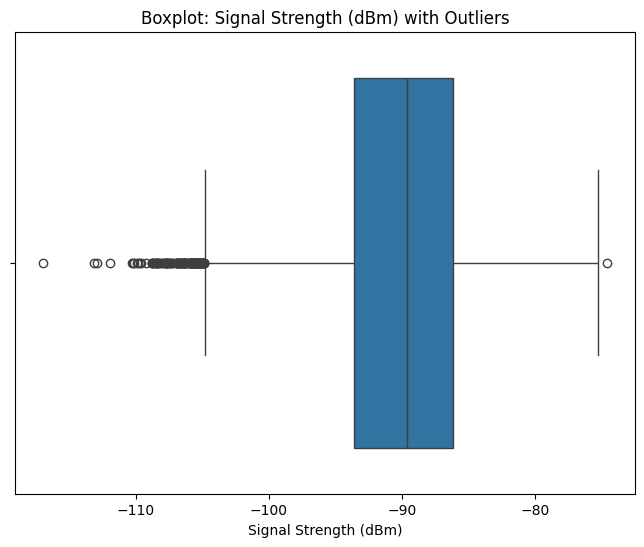

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot untuk menunjukkan outlier pada Signal Strength
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Signal Strength (dBm)'])
plt.title('Boxplot: Signal Strength (dBm) with Outliers')
plt.xlabel('Signal Strength (dBm)')
plt.show()

### 2.5.2. Outliers Latency (ms)

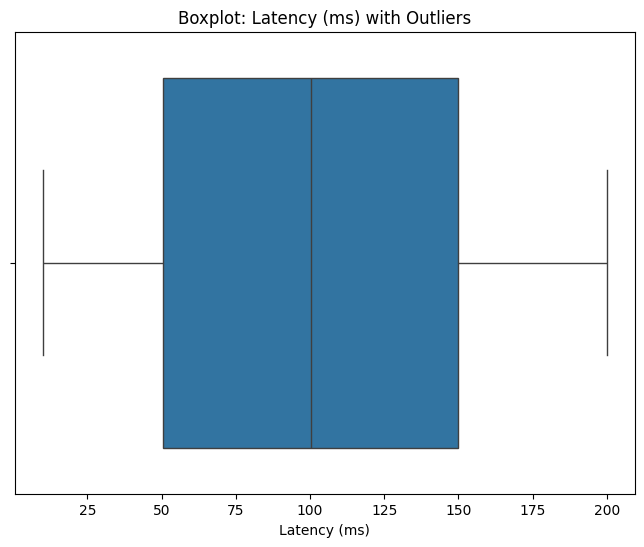

In [ ]:
# Boxplot untuk menunjukkan outlier pada Latency
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Latency (ms)'])
plt.title('Boxplot: Latency (ms) with Outliers')
plt.xlabel('Latency (ms)')
plt.show()

### 2.5.3. Outliers Data Throughput (Mbps)

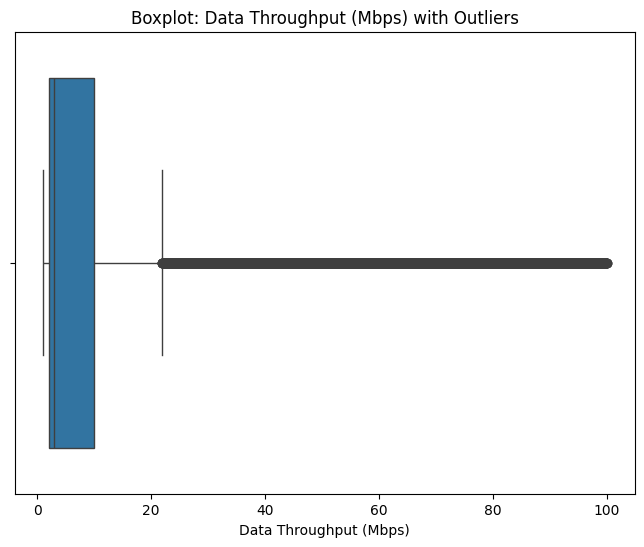

In [ ]:
# Boxplot untuk menunjukkan outlier pada Data Throughput
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Data Throughput (Mbps)'])
plt.title('Boxplot: Data Throughput (Mbps) with Outliers')
plt.xlabel('Data Throughput (Mbps)')
plt.show()

### 2.5.4. Outliers Network Types

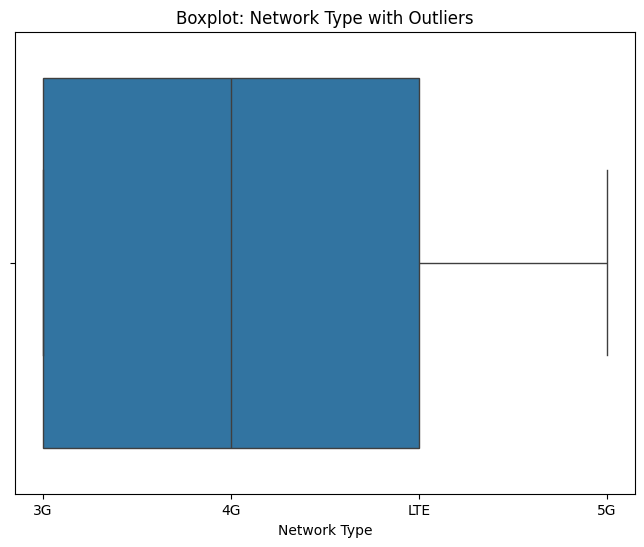

In [ ]:
# Boxplot untuk menunjukkan outlier pada Network Type
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Network Type'])
plt.title('Boxplot: Network Type with Outliers')
plt.xlabel('Network Type')
plt.show()

### 2.5.5. Outliers Locality

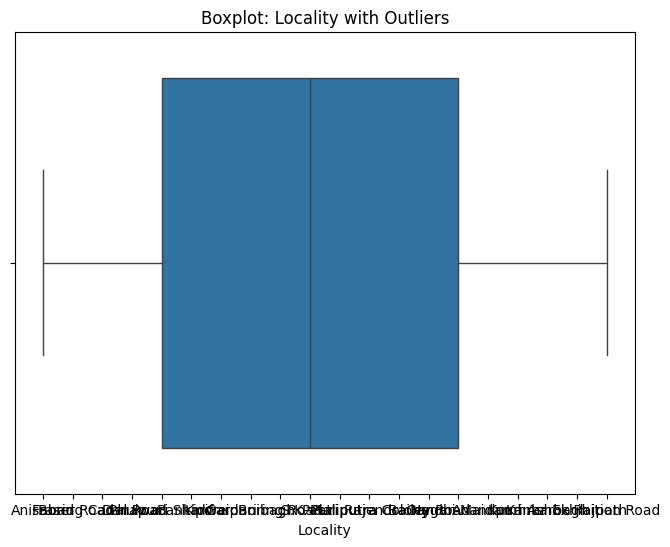

In [ ]:
# Boxplot untuk menunjukkan outlier pada Locality
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Locality'])
plt.title('Boxplot: Locality with Outliers')
plt.xlabel('Locality')
plt.show()

## 2.6 Menghapus Outliers

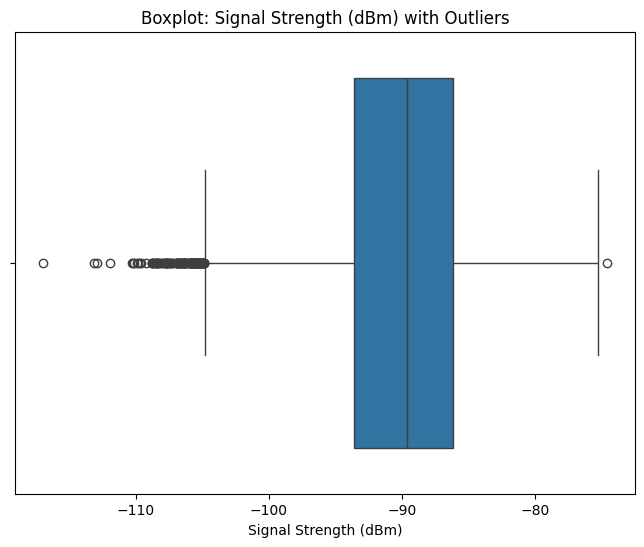

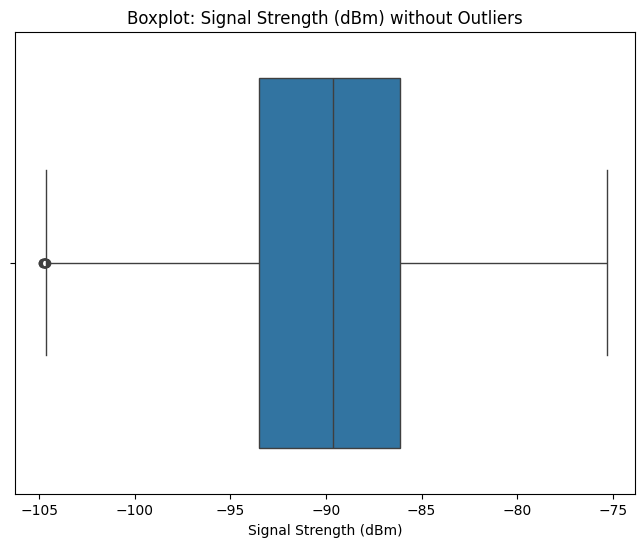

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot untuk menunjukkan outlier pada Signal Strength
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Signal Strength (dBm)'])
plt.title('Boxplot: Signal Strength (dBm) with Outliers')
plt.xlabel('Signal Strength (dBm)')
plt.show()

# Menghitung IQR
Q1 = df['Signal Strength (dBm)'].quantile(0.25)
Q3 = df['Signal Strength (dBm)'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah untuk menandai outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier dari dataframe
df_no_outliers = df[(df['Signal Strength (dBm)'] >= lower_bound) & (df['Signal Strength (dBm)'] <= upper_bound)]

# Boxplot tanpa outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Signal Strength (dBm)'])
plt.title('Boxplot: Signal Strength (dBm) without Outliers')
plt.xlabel('Signal Strength (dBm)')
plt.show()


# BAB 3 - Pemilihan Model (Supervised Learning-Decision Tree)

Pada Datasets terdapat beberapa kategori dan object yang bisa dijadikan sebagai acuan untuk menentukan QoS jaringan sebuah Local, Seperti Locality yang nanti akan dipasangkan dengan Klasifikasi QoS. Setelah QoS dapat dihasilkan, Model ML dapat memberikan saran berupa Pemetaan Otomoatis Infrastruktur (Penambahan Tower) dimana nanti Pemetaan ini akan berguna untuk membantu Local yang QoS nya tergolong kecil.

Setelah saya membaca beberapa artikel dan jurnal, saya mendapatkan ide untuk menggunakan Model Random Forest.

1. Kemampuan Random Forest:
Random Forest dapat digunakan baik untuk masalah klasifikasi (seperti mengelompokkan lokasi ke dalam kategori QoS) maupun regresi (memprediksi nilai QoS numerik). Ini memberikan fleksibilitas dalam menangani variasi tugas.

2. Keakuratan yang Tinggi:
Random Forest sering memberikan hasil yang akurat karena menggabungkan keputusan dari banyak pohon keputusan yang independen. Hal ini dapat berguna ketika pemetaan infrastruktur membutuhkan prediksi yang dapat diandalkan berdasarkan data latih yang bervariasi.

3. Fleksibilitas Terhadap Fitur-fitur Lokasi:
Model Random Forest dapat menangani campuran fitur numerik dan kategori dengan baik. Jika fitur-fitur lokasi  memiliki karakteristik yang berbeda, Random Forest dapat menyesuaikan diri dengan baik terhadap keanekaragaman ini.

4. Manajemen Overfitting:
Random Forest memiliki kecenderungan untuk tidak overfitting pada data latih, terutama ketika menggunakan sejumlah besar pohon. Ini berguna untuk memastikan bahwa model tidak terlalu menggeneralisasi data latih dan dapat memberikan prediksi yang baik pada data yang belum pernah dilihat sebelumnya.

5. Interpretabilitas Relatif:
Meskipun tidak seinterpretatif seperti model linear, Random Forest menyediakan informasi tentang kepentingan relatif fitur-fitur yang digunakan dalam pengambilan keputusan. Ini dapat membantu pemahaman tentang faktor-faktor apa yang mempengaruhi hasil prediksi.

6. Toleransi Terhadap Outlier:
Random Forest dapat menangani data yang mungkin berisi noise atau outlier tanpa terlalu mempengaruhi performa keseluruhan model.

7. Pengelolaan Variabel Latihan:
Model ini dapat mengatasi banyak variabel latihan tanpa memerlukan pra-pemrosesan data yang ekstensif, yang sering terjadi dalam tugas pemetaan infrastruktur.

## 3.1 Decision Tree

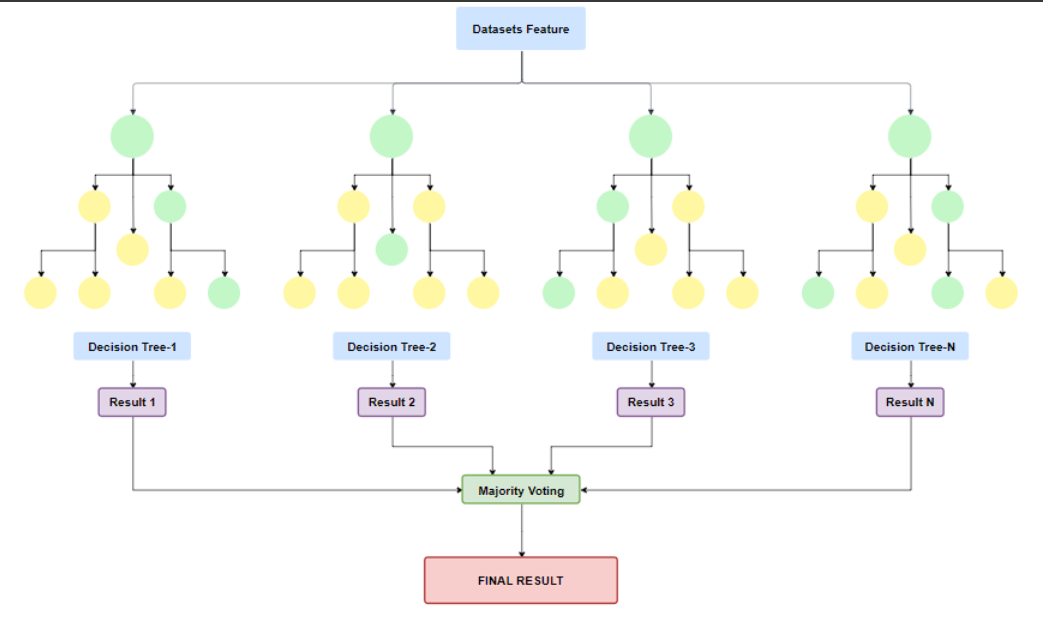

Setelah memilih Model dan menggambarkan Arsitektur, saya akan membagikan atau merancang alur flowchart untuk Pelatihan Model.

## 3.2 Flowchart Pelatihan Model

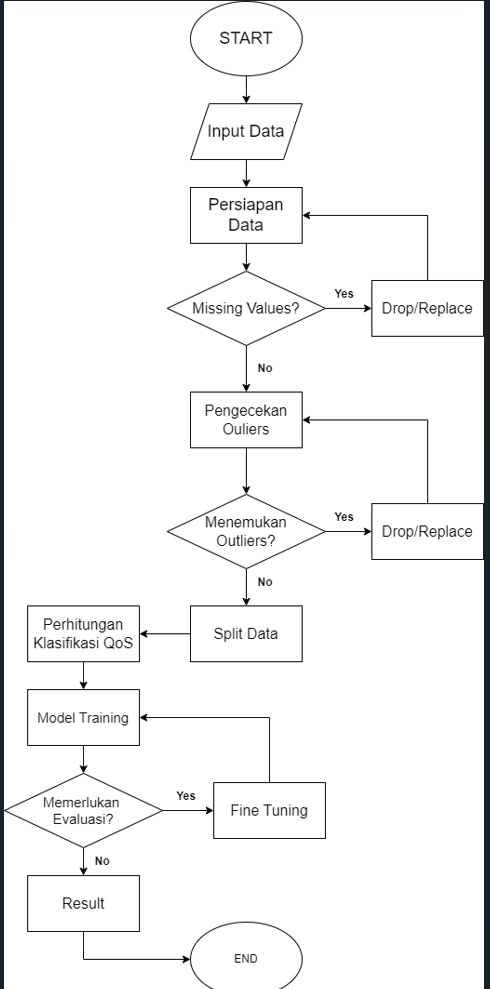

1. Persiapan Data:
Tahap awal adalah mempersiapkan data untuk analisis. Melibatkan pengumpulan, pembersihan, dan pemformatan data agar sesuai dengan kebutuhan analisis selanjutnya.

2. Data Train:
Data dibagi menjadi dua bagian utama: Data Train dan Data Test. Data Train digunakan untuk melatih model machine learning, sedangkan Data Test akan digunakan untuk menguji kinerja model yang sudah dilatih.

3. Perhitungan QoS dari Data Train:
QoS (Quality of Service) dihitung berdasarkan data Train. Melibatkan pengukuran faktor-faktor seperti latency, throughput, atau parameter lain pada datasets yang relevan dengan kualitas layanan.

4. Klasifikasi Tingkat QoS:
Data Train digunakan untuk melatih model klasifikasi yang dapat mengkategorikan tingkat QoS dari suatu lokasi, seperti tinggi, sedang, atau rendah.

5. Klasifikasi Locality berdasarkan Tingkat QoS pada Lokal tersebut:
Menggunakan model klasifikasi yang telah dilatih, dilakukan klasifikasi tingkat QoS untuk setiap lokasi di dalam dataset. Lokasi kemudian diklasifikasikan berdasarkan tingkat QoS yang telah diatributkan kepadanya.

6. Pemodelan Random Forest untuk Regresi:
Model Random Forest untuk regresi dilatih menggunakan Data Train. Tujuan dari pemodelan ini mungkin adalah memprediksi nilai numerik, seperti penambahan infrastruktur yang diperlukan berdasarkan tingkat QoS.

7. Prediksi Penambahan Infrastruktur:
Model Random Forest yang sudah dilatih digunakan untuk memprediksi penambahan infrastruktur yang dibutuhkan berdasarkan data masukan, seperti tingkat QoS dan mungkin faktor-faktor lain yang relevan.

8. Evaluasi Model:
Kinerja model dievaluasi menggunakan Data Test yang sebelumnya tidak pernah dilihat oleh model. Ini membantu untuk memastikan bahwa model dapat generalisasi dengan baik pada data yang baru dan tidak terlihat sebelumnya.

9. Penerapan Model pada Data Test:
Setelah model dianggap memadai berdasarkan evaluasi, model tersebut kemudian diimplementasikan pada Data Test untuk melihat sejauh mana model mampu memberikan prediksi yang akurat pada situasi dunia nyata.

# BAB 4 - Pelatihan Model

In [ ]:
df.head(5)

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G


## 4.1 Pembagian Datasets

### 4.1.1. Mengurangi Datasets menjadi 1000 agar lebih mudah di proses.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Path ke file CSV
path = '/content/gdrive/My Drive/Prak ML/signal_metrics.csv'

# Membaca CSV ke dalam DataFrame
df = pd.read_csv(path)

# Mengambil sejumlah baris pertama (misalnya, 100 baris)
subset_data = df.head(1000)

# Memisahkan data subset menjadi bagian pelatihan (80%) dan pengujian (20%)
train_data, test_data = train_test_split(subset_data, test_size=0.2, random_state=42)

### 4.1.2. Membagi Datasets Menjadi Data Train dan Data Test

In [ ]:
# Menampilkan informasi tentang bagian pelatihan setelah drop
print("Info Data Pelatihan setelah drop:")
print(train_data.info())

# Menampilkan informasi tentang bagian pengujian setelah drop
print("\nInfo Data Pengujian setelah drop:")
print(test_data.info())

Info Data Pelatihan setelah drop:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     800 non-null    object 
 1   Locality                      800 non-null    object 
 2   Latitude                      800 non-null    float64
 3   Longitude                     800 non-null    float64
 4   Signal Strength (dBm)         800 non-null    float64
 5   Signal Quality (%)            800 non-null    float64
 6   Data Throughput (Mbps)        800 non-null    float64
 7   Latency (ms)                  800 non-null    float64
 8   Network Type                  800 non-null    object 
 9   BB60C Measurement (dBm)       800 non-null    float64
 10  srsRAN Measurement (dBm)      800 non-null    float64
 11  BladeRFxA9 Measurement (dBm)  800 non-null    float64
dtypes: float64(9), object(3)
memory us

## 4.2 Perhitungan dan Klasifikasi tingkat QoS dari Data Train

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Asumsi bobot
w1 = w2 = w3 = w4 = 1

# Asumsi nilai minimum dan maksimum
min_signal_strength = 0
max_signal_strength = 100
min_data_throughput = 0
max_data_throughput = 100
min_latency = 0
max_latency = 100

# Menghitung QoS untuk setiap baris data
train_data['QoS'] = (
    w1 * (train_data['Signal Strength (dBm)'] - min_signal_strength) / (max_signal_strength - min_signal_strength) +
    w2 * (train_data['Data Throughput (Mbps)'] - min_data_throughput) / (max_data_throughput - min_data_throughput) +
    w3 * (train_data['Latency (ms)'] - min_latency) / (max_latency - min_latency) +
    w4 * train_data['Network Type'].astype('category').cat.codes / len(train_data['Network Type'].unique())
)

# Menampilkan DataFrame dengan hasil perhitungan QoS dan kolom 'Latitude' dan 'Longitude'
result_df = train_data[['Locality', 'QoS', 'Latitude', 'Longitude', 'Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)', 'Network Type']]

# Menentukan batas klasifikasi QoS
threshold_bad = 0.4
threshold_good = 0.7

# Menambahkan kolom 'QoS_Category' ke DataFrame result_df
result_df['QoS_Category'] = pd.cut(result_df['QoS'], bins=[-float('inf'), threshold_bad, threshold_good, float('inf')],
                                   labels=['Buruk', 'Sedang', 'Baik'], right=False)

# Menampilkan DataFrame hasil dengan kategori QoS
print(result_df[['Locality', 'Latitude', 'Longitude', 'Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)', 'Network Type', 'QoS', 'QoS_Category']])

              Locality   Latitude  Longitude  Signal Strength (dBm)  \
29         Pataliputra  25.626800  85.048880             -86.427014   
535        Boring Road  25.519276  85.087572             -94.319827   
695  Boring Canal Road  25.609231  85.007381             -87.409766   
557        Gardanibagh  25.666730  85.206739             -77.586259   
836         Kankarbagh  25.661988  85.014953             -87.572861   
..                 ...        ...        ...                    ...   
106  Patliputra Colony  25.714788  85.020294             -82.292592   
270      Gandhi Maidan  25.518670  85.281725             -85.187064   
860         Kankarbagh  25.639334  85.236360             -83.653550   
435     Rajendra Nagar  25.579014  85.266401             -87.134886   
102            Kumhrar  25.537276  85.271067             -84.812022   

     Data Throughput (Mbps)  Latency (ms) Network Type       QoS QoS_Category  
29                 2.194556    198.625700           3G  1.143932   

<ipython-input-44-8c144b71be98>:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 4.3 Pemilihan Fitur dan Target

Fitur yang dipilih adalah :
1. Network Type
2. Signal Strength
3. Data Throughput
4. Latency

Target yang dipilih adalah :
1. QoS (Untuk Model Regresi)
2. QoS_Category (Untuk Model Classifier)

## 4.5 Arsitektur Decision Tree Regression dengan Ketiga Model

Model yang digunakan :
1. Random Forest
2. Gradient Boost
3. Ada Boost

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
# Misalkan result_df adalah DataFrame yang berisi data

# Mengonversi kolom 'Network Type' menjadi one-hot encoding
network_dummies = pd.get_dummies(result_df['Network Type'], drop_first=True)

# Menggabungkan one-hot encoding dengan fitur-fitur lainnya
X = pd.concat([network_dummies, result_df[['Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)']]], axis=1)
y = result_df['QoS']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

# Inisialisasi dan melatih model Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=67)
rf_regressor.fit(X_train, y_train)

# Inisialisasi dan melatih model Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=67)
gb_regressor.fit(X_train, y_train)

# Inisialisasi dan melatih model AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(n_estimators=100, random_state=67)
adaboost_regressor.fit(X_train, y_train)

# Memprediksi nilai QoS pada set pengujian untuk setiap model
y_pred_rf = rf_regressor.predict(X_test)
y_pred_gb = gb_regressor.predict(X_test)
y_pred_adaboost = adaboost_regressor.predict(X_test)

# Menghitung Mean Squared Error (MSE) untuk setiap model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)

# Menampilkan hasil MSE untuk setiap model
print("Mean Squared Error (MSE) Random Forest Regressor:", mse_rf)
print("Mean Squared Error (MSE) Gradient Boosting Regressor:", mse_gb)
print("Mean Squared Error (MSE) AdaBoost Regressor:", mse_adaboost)

# Menentukan model terbaik berdasarkan MSE
best_model = min({
    "Random Forest Regressor": mse_rf,
    "Gradient Boosting Regressor": mse_gb,
    "AdaBoost Regressor": mse_adaboost
}.items(), key=lambda x: x[1])

print(f"The best model is: {best_model[0]} with MSE: {best_model[1]}")


Mean Squared Error (MSE) Random Forest Regressor: 0.00135937295289493
Mean Squared Error (MSE) Gradient Boosting Regressor: 0.0011846919138595664
Mean Squared Error (MSE) AdaBoost Regressor: 0.005939770856918039
The best model is: Gradient Boosting Regressor with MSE: 0.0011846919138595664


## 4.6 Arsitektur Decision Tree Classification dengan Ketiga Model

Model yang digunakan :
1. Random Forest
2. Gradient Boost
3. Ada Boost

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

# Load data
# Misalkan result_df adalah DataFrame yang berisi data

# Mengonversi kolom 'Network Type' menjadi one-hot encoding
network_dummies = pd.get_dummies(result_df['Network Type'], drop_first=True)

# Menggabungkan one-hot encoding dengan fitur-fitur lainnya
X = pd.concat([network_dummies, result_df[['Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)']]], axis=1)
y = result_df['QoS_Category']

# Mengelompokkan nilai-nilai dalam kolom 'QoS' menjadi 3 interval
# kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
# y_binned = kbins.fit_transform(y.values.reshape(-1, 1))

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

# Inisialisasi dan melatih model Random Forest Classifier dengan parameter yang disetel lebih baik
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=67)
rf_classifier.fit(X_train, y_train)

# Inisialisasi dan melatih model Gradient Boosting Classifier dengan parameter yang disetel lebih baik
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=67)
gb_classifier.fit(X_train, y_train)

# Inisialisasi dan melatih model AdaBoost Classifier dengan parameter yang disetel lebih baik
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=67)
adaboost_classifier.fit(X_train, y_train)

# Memprediksi kelas pada set pengujian untuk setiap model
y_pred_rf = rf_classifier.predict(X_test)
y_pred_gb = gb_classifier.predict(X_test)
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Menghitung akurasi untuk setiap model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

# Menampilkan hasil akurasi untuk setiap model
print("Accuracy Random Forest Classifier:", accuracy_rf)
print("Accuracy Gradient Boosting Classifier:", accuracy_gb)
print("Accuracy AdaBoost Classifier:", accuracy_adaboost)

# Menentukan model terbaik berdasarkan akurasi
best_model = max({
    "Random Forest Classifier": accuracy_rf,
    "Gradient Boosting Classifier": accuracy_gb,
    "AdaBoost Classifier": accuracy_adaboost
}.items(), key=lambda x: x[1])

print(f"The best model is: {best_model[0]} with Accuracy: {best_model[1]}")

Accuracy Random Forest Classifier: 0.95
Accuracy Gradient Boosting Classifier: 0.95625
Accuracy AdaBoost Classifier: 0.8375
The best model is: Gradient Boosting Classifier with Accuracy: 0.95625


# BAB 5 - Optimasi Hyperparamater

## 5.1 Arsitektur Decision Tree Regression dengan Perbandingan 3 Model

Model yang digunakan :
1.   Random Forest
2.   Gradient Boost
3.   AdaBoost


Untuk melakukan optimasi hyperparameter, kita dapat menggunakan Grid Search Cross-Validation.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Load data
# Misalkan result_df adalah DataFrame yang berisi data

# Mengonversi kolom 'Network Type' menjadi one-hot encoding
network_dummies = pd.get_dummies(result_df['Network Type'], drop_first=True)

# Menggabungkan one-hot encoding dengan fitur-fitur lainnya
X = pd.concat([network_dummies, result_df[['Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)']]], axis=1)
y = result_df['QoS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models and parameters to be tested
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

param_grid_ab = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Create GridSearchCV objects
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_ab = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid_ab, cv=5, scoring='neg_mean_squared_error')

# Train models with training data
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_ab.fit(X_train, y_train)

# Get the best model for each type of model
best_model_rf = grid_search_rf.best_estimator_
best_model_gb = grid_search_gb.best_estimator_
best_model_ab = grid_search_ab.best_estimator_

# Predict values on the testing set for each best model
y_pred_rf = best_model_rf.predict(X_test)
y_pred_gb = best_model_gb.predict(X_test)
y_pred_ab = best_model_ab.predict(X_test)

# Calculate mean squared error (MSE) for each best model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_ab = mean_squared_error(y_test, y_pred_ab)

# Display the best hyperparameters for each model
print("Best Hyperparameters for Random Forest Regressor:")
print(grid_search_rf.best_params_)

print("\nBest Hyperparameters for Gradient Boosting Regressor:")
print(grid_search_gb.best_params_)

print("\nBest Hyperparameters for AdaBoost Regressor:")
print(grid_search_ab.best_params_)

# Display the MSE for each best model
print("Mean Squared Error (MSE) Random Forest Regressor:", mse_rf)
print("Mean Squared Error (MSE) Gradient Boosting Regressor:", mse_gb)
print("Mean Squared Error (MSE) AdaBoost Regressor:", mse_ab)

# Determine the best model based on MSE
best_mse = min(mse_rf, mse_gb, mse_ab)
best_model = {
    mse_rf: "Random Forest Regressor",
    mse_gb: "Gradient Boosting Regressor",
    mse_ab: "AdaBoost Regressor"
}[best_mse]

print(f"The best model is: {best_model} with MSE: {best_mse}")

Best Hyperparameters for Random Forest Regressor:
{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}

Best Hyperparameters for Gradient Boosting Regressor:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 300}

Best Hyperparameters for AdaBoost Regressor:
{'learning_rate': 0.5, 'n_estimators': 300}
Mean Squared Error (MSE) Random Forest Regressor: 0.0031395468331695707
Mean Squared Error (MSE) Gradient Boosting Regressor: 0.0008201695267404622
Mean Squared Error (MSE) AdaBoost Regressor: 0.009581318522849783
The best model is: Gradient Boosting Regressor with MSE: 0.0008201695267404622


## 5.2 Evaluasi Model Regression

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# Menghitung R^2 Score untuk setiap model
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_ab = r2_score(y_test, y_pred_ab)

print("R^2 Score Random Forest Regressor:", r2_rf)
print("R^2 Score Gradient Boosting Regressor:", r2_gb)
print("R^2 Score AdaBoost Regressor:", r2_ab)

# Menghitung Mean Absolute Error (MAE) untuk setiap model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mae_ab = mean_absolute_error(y_test, y_pred_ab)

print("Mean Absolute Error Random Forest Regressor:", mae_rf)
print("Mean Absolute Error Gradient Boosting Regressor:", mae_gb)
print("Mean Absolute Error AdaBoost Regressor:", mae_ab)

# Menampilkan hasil evaluasi
print("\nEvaluation Results:")
print("============================================")
print("Model\t\t\tR^2 Score\t\tMAE\t\tMSE")
print("--------------------------------------------")
print("Random Forest\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(r2_rf, mae_rf, mse_rf))
print("Gradient Boosting\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(r2_gb, mae_gb, mse_gb))
print("AdaBoost\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(r2_ab, mae_ab, mse_ab))
print("============================================")


R^2 Score Random Forest Regressor: 0.9909880261524162
R^2 Score Gradient Boosting Regressor: 0.9976457282791643
R^2 Score AdaBoost Regressor: 0.9724971161312091
Mean Absolute Error Random Forest Regressor: 0.03907670325215622
Mean Absolute Error Gradient Boosting Regressor: 0.020481849933342563
Mean Absolute Error AdaBoost Regressor: 0.07334211638261828

Evaluation Results:
Model			R^2 Score		MAE		MSE
--------------------------------------------
Random Forest		0.9910		0.0391		0.0031
Gradient Boosting	0.9976		0.0205		0.0008
AdaBoost		0.9725		0.0733		0.0096


## 5.3 Arsitektur Decision Tree Classifier dengan Perbandingan 3 Model

Model yang digunakan :
1.   Random Forest
2.   Gradient Boost
3.   AdaBoost

Untuk melakukan optimasi hyperparameter, kita dapat menggunakan Grid Search Cross-Validation.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer

# Load data
# Misalkan result_df adalah DataFrame yang berisi data

# Mengonversi kolom 'Network Type' menjadi one-hot encoding
network_dummies = pd.get_dummies(result_df['Network Type'], drop_first=True)

# Menggabungkan one-hot encoding dengan fitur-fitur lainnya
X = pd.concat([network_dummies, result_df[['Signal Strength (dBm)', 'Data Throughput (Mbps)', 'Latency (ms)']]], axis=1)
y = result_df['QoS_Category']

# Mengelompokkan nilai-nilai dalam kolom 'QoS' menjadi 3 interval
# kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
# y_binned = kbins.fit_transform(y.values.reshape(-1, 1))

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model dan parameter yang akan diuji
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

param_grid_ab = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Membuat objek GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5)
grid_search_ab = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ab, cv=5)

# Melatih model dengan data pelatihan
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_ab.fit(X_train, y_train)

# Mendapatkan model terbaik untuk setiap jenis model
best_model_rf = grid_search_rf.best_estimator_
best_model_gb = grid_search_gb.best_estimator_
best_model_ab = grid_search_ab.best_estimator_

# Memprediksi kelas pada set pengujian untuk setiap model terbaik
y_pred_rf = best_model_rf.predict(X_test)
y_pred_gb = best_model_gb.predict(X_test)
y_pred_ab = best_model_ab.predict(X_test)

# Menghitung akurasi untuk setiap model terbaik
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_ab = accuracy_score(y_test, y_pred_ab)

# Menampilkan hyperparameter terbaik untuk setiap model
print("Best Hyperparameters for Random Forest Classifier:")
print(grid_search_rf.best_params_)

print("\nBest Hyperparameters for Gradient Boosting Classifier:")
print(grid_search_gb.best_params_)

print("\nBest Hyperparameters for AdaBoost Classifier:")
print(grid_search_ab.best_params_)

# Menampilkan hasil akurasi untuk setiap model terbaik
print("Accuracy Random Forest Classifier:", accuracy_rf)
print("Accuracy Gradient Boosting Classifier:", accuracy_gb)
print("Accuracy AdaBoost Classifier:", accuracy_ab)

# Menentukan model terbaik berdasarkan akurasi
best_accuracy = max(accuracy_rf, accuracy_gb, accuracy_ab)
best_model = {
    accuracy_rf: "Random Forest Classifier",
    accuracy_gb: "Gradient Boosting Classifier",
    accuracy_ab: "AdaBoost Classifier"
}[best_accuracy]

print(f"The best model is: {best_model} with Accuracy: {best_accuracy}")

Best Hyperparameters for Random Forest Classifier:
{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}

Best Hyperparameters for Gradient Boosting Classifier:
{'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}

Best Hyperparameters for AdaBoost Classifier:
{'learning_rate': 0.01, 'n_estimators': 200}
Accuracy Random Forest Classifier: 0.95
Accuracy Gradient Boosting Classifier: 0.95
Accuracy AdaBoost Classifier: 0.90625
The best model is: Gradient Boosting Classifier with Accuracy: 0.95


## 5.4 Evaluasi Model Classifiers

In [ ]:
from sklearn.metrics import classification_report

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
class_report_gb = classification_report(y_test, y_pred_gb)
class_report_ab = classification_report(y_test, y_pred_ab)

# Menampilkan Classification Report
print("Random Forest Classifier:")
print(class_report_rf)

print("\nGradient Boosting Classifier:")
print(class_report_gb)

print("\nAdaBoost Classifier:")
print(class_report_ab)

Random Forest Classifier:
              precision    recall  f1-score   support

        Baik       0.98      0.95      0.97        65
       Buruk       0.96      0.99      0.97        77
      Sedang       0.78      0.78      0.78        18

    accuracy                           0.95       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.95      0.95      0.95       160


Gradient Boosting Classifier:
              precision    recall  f1-score   support

        Baik       0.94      1.00      0.97        65
       Buruk       0.96      0.99      0.97        77
      Sedang       0.92      0.61      0.73        18

    accuracy                           0.95       160
   macro avg       0.94      0.87      0.89       160
weighted avg       0.95      0.95      0.95       160


AdaBoost Classifier:
              precision    recall  f1-score   support

        Baik       0.97      0.89      0.93        65
       Buruk       0.94      0.99      0.96       

# BAB 6 - Fine-Tuning menggunakan GridSearch

## 6.1 Fine-Tuning menggunakan GridSearch untuk ketiga Model

Arsitektur Decision Tree Regression

### 6.1.1. Fine-tuning Random Forest Regressor

In [ ]:
# Definisikan grid parameter yang lebih spesifik untuk Random Forest Regressor
param_grid_rf_finetune = {
    'n_estimators': [300, 500, 700],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 15]
}

# Buat objek GridSearchCV untuk fine-tuning Random Forest Regressor
grid_search_rf_finetune = GridSearchCV(estimator=best_model_rf, param_grid=param_grid_rf_finetune, cv=5, scoring='neg_mean_squared_error')

# Lakukan fitting data pada model menggunakan GridSearchCV untuk fine-tuning
grid_search_rf_finetune.fit(X_train, y_train)

# Mendapatkan model terbaik setelah fine-tuning
best_model_rf_finetune = grid_search_rf_finetune.best_estimator_

# Memprediksi nilai QoS pada set pengujian menggunakan model dengan hyperparameter terbaik setelah fine-tuning
y_pred_rf_finetune = best_model_rf_finetune.predict(X_test)

# Menghitung Mean Squared Error (MSE) setelah fine-tuning
mse_rf_finetune = mean_squared_error(y_test, y_pred_rf_finetune)

# Menampilkan hasil MSE setelah fine-tuning
print("Mean Squared Error (MSE) Random Forest Regressor (after fine-tuning):", mse_rf_finetune)

# Bandingkan dengan hasil MSE sebelum fine-tuning
if mse_rf_finetune < mse_rf:
    print("Fine-tuning improved the model performance!")
else:
    print("Fine-tuning did not improve the model performance.")

Mean Squared Error (MSE) Random Forest Regressor (after fine-tuning): 0.001449562501502045
Fine-tuning improved the model performance!


### 6.1.2. Fine-tuning Gradient Boosting Regressor

In [ ]:
# Definisikan grid parameter yang lebih spesifik untuk Gradient Boosting Regressor
param_grid_gb_finetune = {
    'n_estimators': [500, 700],
    'learning_rate': [0.001, 0.01],
    'max_depth': [5, 10],
}


# Buat objek GridSearchCV untuk fine-tuning Gradient Boosting Regressor
grid_search_gb_finetune = GridSearchCV(estimator=best_model_gb, param_grid=param_grid_gb_finetune, cv=5, scoring='neg_mean_squared_error')

# Lakukan fitting data pada model menggunakan GridSearchCV untuk fine-tuning
grid_search_gb_finetune.fit(X_train, y_train)

# Mendapatkan model terbaik setelah fine-tuning
best_model_gb_finetune = grid_search_gb_finetune.best_estimator_

# Memprediksi nilai QoS pada set pengujian menggunakan model dengan hyperparameter terbaik setelah fine-tuning
y_pred_gb_finetune = best_model_gb_finetune.predict(X_test)

# Menghitung Mean Squared Error (MSE) setelah fine-tuning
mse_gb_finetune = mean_squared_error(y_test, y_pred_gb_finetune)

# Menampilkan hasil MSE setelah fine-tuning
print("Mean Squared Error (MSE) Gradient Boosting Regressor (after fine-tuning):", mse_gb_finetune)

# Bandingkan dengan hasil MSE sebelum fine-tuning
if mse_gb_finetune < mse_gb:
    print("Fine-tuning improved the model performance!")
else:
    print("Fine-tuning did not improve the model performance.")

Mean Squared Error (MSE) Gradient Boosting Regressor (after fine-tuning): 0.0011530431128088364
Fine-tuning did not improve the model performance.


### 6.1.3. Fine-Tuning AdaBoost Regressor

In [ ]:
# Definisikan grid parameter yang lebih spesifik untuk AdaBoost Regressor
param_grid_ab_finetune = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Buat objek GridSearchCV untuk fine-tuning AdaBoost Regressor
grid_search_ab_finetune = GridSearchCV(estimator=best_model_ab, param_grid=param_grid_ab_finetune, cv=5, scoring='neg_mean_squared_error')

# Lakukan fitting data pada model menggunakan GridSearchCV untuk fine-tuning
grid_search_ab_finetune.fit(X_train, y_train)

# Mendapatkan model terbaik setelah fine-tuning
best_model_ab_finetune = grid_search_ab_finetune.best_estimator_

# Memprediksi nilai QoS pada set pengujian menggunakan model dengan hyperparameter terbaik setelah fine-tuning
y_pred_ab_finetune = best_model_ab_finetune.predict(X_test)

# Menghitung Mean Squared Error (MSE) setelah fine-tuning
mse_ab_finetune = mean_squared_error(y_test, y_pred_ab_finetune)

# Menampilkan hasil MSE setelah fine-tuning
print("Mean Squared Error (MSE) AdaBoost Regressor (after fine-tuning):", mse_ab_finetune)

# Bandingkan dengan hasil MSE sebelum fine-tuning
if mse_ab_finetune < mse_ab:
    print("Fine-tuning improved the model performance!")
else:
    print("Fine-tuning did not improve the model performance.")

Mean Squared Error (MSE) AdaBoost Regressor (after fine-tuning): 0.009494969326783124
Fine-tuning improved the model performance!


Jika fine-tuning tidak berhasil meningkatkan kinerja model, maka hasil yang diperoleh adalah MSE yang sama atau bahkan lebih buruk setelah fine-tuning. Ini bisa terjadi karena beberapa alasan:

1. Hyperparameter yang sudah optimal: Mungkin saja setelah melalui proses GridSearchCV, model telah menggunakan kombinasi hyperparameter yang sudah cukup optimal. Fine-tuning kemudian tidak memberikan perubahan yang signifikan karena tidak ada perbaikan yang dapat dilakukan lebih lanjut.

2. Ukuran Grid Parameter yang Kurang Luas: Mungkin grid parameter yang Anda tentukan untuk fine-tuning tidak cukup luas atau tidak mencakup kombinasi hyperparameter yang optimal. Dalam hal ini, memperluas grid parameter atau mengubah rentang nilai hyperparameter yang ditelusuri bisa membantu.

## 6.2 Fine-Tuning menggunakan GridSearch untuk ketiga Model

Arsitektur Decision Tree Classifier

### 6.2.1. Fine-Tuning Random Forest Classifier

In [ ]:
# Definisikan grid parameter yang lebih spesifik untuk Random Forest Classifier
param_grid_rf_finetune = {
    'n_estimators': [300, 500, 700],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 15]
}

# Buat objek GridSearchCV untuk fine-tuning Random Forest Classifier
grid_search_rf_finetune = GridSearchCV(estimator=best_model_rf, param_grid=param_grid_rf_finetune, cv=5, scoring='accuracy')

# Lakukan fitting data pada model menggunakan GridSearchCV untuk fine-tuning
grid_search_rf_finetune.fit(X_train, y_train)

# Mendapatkan model terbaik setelah fine-tuning
best_model_rf_finetune = grid_search_rf_finetune.best_estimator_

# Memprediksi kelas pada set pengujian menggunakan model dengan hyperparameter terbaik setelah fine-tuning
y_pred_rf_finetune = best_model_rf_finetune.predict(X_test)

# Menghitung akurasi setelah fine-tuning
accuracy_rf_finetune = accuracy_score(y_test, y_pred_rf_finetune)

# Menampilkan hasil akurasi setelah fine-tuning
print("Accuracy Random Forest Classifier (after fine-tuning):", accuracy_rf_finetune)

# Bandingkan dengan hasil akurasi sebelum fine-tuning
if accuracy_rf_finetune > accuracy_rf:
    print("Fine-tuning improved the model performance!")
elif accuracy_rf_finetune == accuracy_rf:
    print("No improvement achieved through fine-tuning.")
else:
    print("Fine-tuning did not improve the model performance.")


Accuracy Random Forest Classifier (after fine-tuning): 0.975
Fine-tuning improved the model performance!


### 6.2.2. Fine-Tuning Gradient Boost Classifier

In [ ]:
# Definisikan grid parameter yang lebih spesifik untuk Gradient Boosting Classifier
param_grid_gb_finetune = {
    'n_estimators': [500, 700],
    'learning_rate': [0.001, 0.01],
    'max_depth': [5, 10],
}

# Buat objek GridSearchCV untuk fine-tuning Gradient Boosting Classifier
grid_search_gb_finetune = GridSearchCV(estimator=best_model_gb, param_grid=param_grid_gb_finetune, cv=5, scoring='accuracy')

# Lakukan fitting data pada model menggunakan GridSearchCV untuk fine-tuning
grid_search_gb_finetune.fit(X_train, y_train)

# Mendapatkan model terbaik setelah fine-tuning
best_model_gb_finetune = grid_search_gb_finetune.best_estimator_

# Memprediksi kelas pada set pengujian menggunakan model dengan hyperparameter terbaik setelah fine-tuning
y_pred_gb_finetune = best_model_gb_finetune.predict(X_test)

# Menghitung akurasi setelah fine-tuning
accuracy_gb_finetune = accuracy_score(y_test, y_pred_gb_finetune)

# Menampilkan hasil akurasi setelah fine-tuning
print("Accuracy Gradient Boosting Classifier (after fine-tuning):", accuracy_gb_finetune)

# Bandingkan dengan hasil akurasi sebelum fine-tuning
if accuracy_gb_finetune > accuracy_gb:
    print("Fine-tuning improved the model performance!")
elif accuracy_gb_finetune == accuracy_gb:
    print("No improvement achieved through fine-tuning.")
else:
    print("Fine-tuning did not improve the model performance.")

Accuracy Gradient Boosting Classifier (after fine-tuning): 0.95
No improvement achieved through fine-tuning.


### 6.2.3. Fine-Tuning AdaBoost Classifier

In [ ]:
# Definisikan grid parameter yang lebih spesifik untuk AdaBoost Classifier
param_grid_ab_finetune = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Buat objek GridSearchCV untuk fine-tuning AdaBoost Classifier
grid_search_ab_finetune = GridSearchCV(estimator=best_model_ab, param_grid=param_grid_ab_finetune, cv=5, scoring='accuracy')

# Lakukan fitting data pada model menggunakan GridSearchCV untuk fine-tuning
grid_search_ab_finetune.fit(X_train, y_train)

# Mendapatkan model terbaik setelah fine-tuning
best_model_ab_finetune = grid_search_ab_finetune.best_estimator_

# Memprediksi kelas pada set pengujian menggunakan model dengan hyperparameter terbaik setelah fine-tuning
y_pred_ab_finetune = best_model_ab_finetune.predict(X_test)

# Menghitung akurasi setelah fine-tuning
accuracy_ab_finetune = accuracy_score(y_test, y_pred_ab_finetune)

# Menampilkan hasil akurasi setelah fine-tuning
print("Accuracy AdaBoost Classifier (after fine-tuning):", accuracy_ab_finetune)

# Bandingkan dengan hasil akurasi sebelum fine-tuning
if accuracy_ab_finetune > accuracy_ab:
    print("Fine-tuning improved the model performance!")
elif accuracy_ab_finetune == accuracy_ab:
    print("No improvement achieved through fine-tuning.")
else:
    print("Fine-tuning did not improve the model performance.")

Accuracy AdaBoost Classifier (after fine-tuning): 0.90625
No improvement achieved through fine-tuning.


# BAB 7 - Interpretasi dan Visualisasi Hasil

## 7.1 Visualisasi Penyebaran Kualitas QoS

Dengan memanfaatkan latitude dan longitude dari data untuk membuat scatter plot, di mana setiap titik akan direpresentasikan oleh kategori QoS yang sesuai.

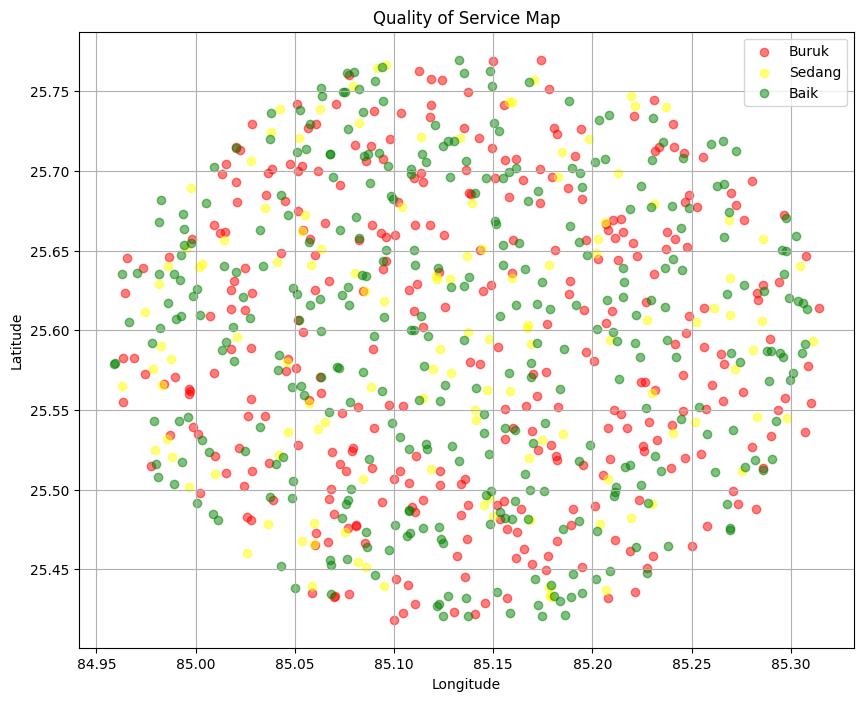

In [ ]:
import matplotlib.pyplot as plt

# Memisahkan data berdasarkan kategori QoS
buruk = result_df[result_df['QoS_Category'] == 'Buruk']
sedang = result_df[result_df['QoS_Category'] == 'Sedang']
baik = result_df[result_df['QoS_Category'] == 'Baik']

# Membuat scatter plot untuk setiap kategori QoS
plt.figure(figsize=(10, 8))
plt.scatter(buruk['Longitude'], buruk['Latitude'], color='red', label='Buruk', alpha=0.5)
plt.scatter(sedang['Longitude'], sedang['Latitude'], color='yellow', label='Sedang', alpha=0.5)
plt.scatter(baik['Longitude'], baik['Latitude'], color='green', label='Baik', alpha=0.5)

# Menambahkan label dan judul
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Quality of Service Map')
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

## 7.2 Visualisasi untuk titik koordinat berdasarkan Kategori QoS

Menggunakan Kernel Density Estimation (KDE)

<ipython-input-68-f94a65460281>:6: UserWarning:



`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-68-f94a65460281>:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




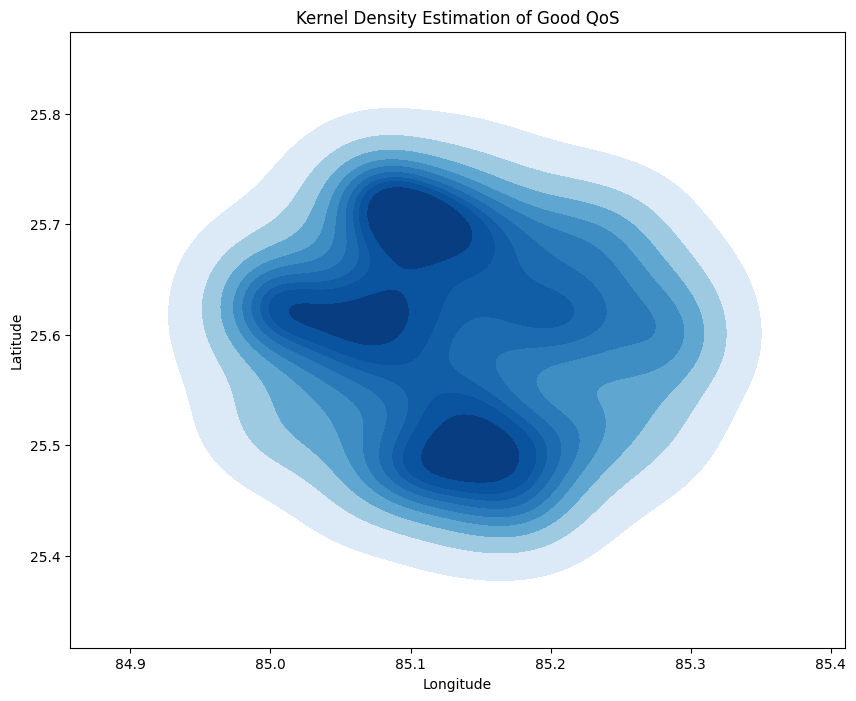

<ipython-input-68-f94a65460281>:14: UserWarning:



`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-68-f94a65460281>:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




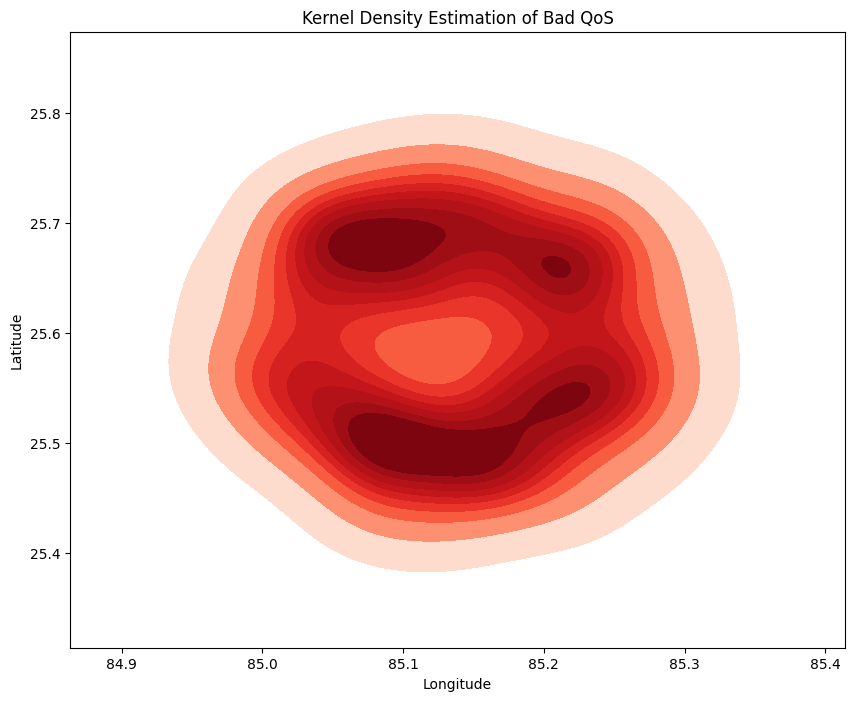

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kernel Density Estimation (KDE) untuk titik koordinat dengan kategori QoS baik
plt.figure(figsize=(10, 8))
sns.kdeplot(x='Longitude', y='Latitude', data=result_df[result_df['QoS_Category'] == 'Baik'], cmap='Blues', shade=True, shade_lowest=False)
plt.title('Kernel Density Estimation of Good QoS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Kernel Density Estimation (KDE) untuk titik koordinat dengan kategori QoS buruk
plt.figure(figsize=(10, 8))
sns.kdeplot(x='Longitude', y='Latitude', data=result_df[result_df['QoS_Category'] == 'Buruk'], cmap='Reds', shade=True, shade_lowest=False)
plt.title('Kernel Density Estimation of Bad QoS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 7.3 Visualisasi dan Interpretasi Hasil

### 7.3.1. Hasil Model Regresi

Perbandingan Nilai Aktual dan Hasil Nilai Prediksi

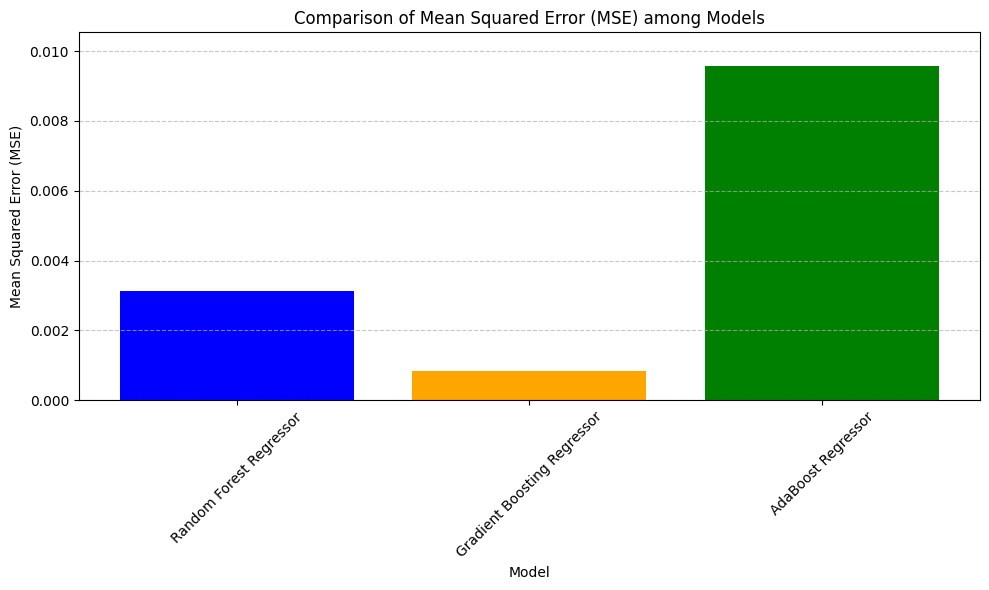

In [ ]:
import matplotlib.pyplot as plt

# Simpan MSE dan nama model dalam sebuah dictionary
mse_scores = {
    "Random Forest Regressor": mse_rf,
    "Gradient Boosting Regressor": mse_gb,
    "AdaBoost Regressor": mse_ab
}

# Plot bar chart untuk membandingkan MSE dari setiap model
plt.figure(figsize=(10, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models')
plt.ylim(0, max(mse_scores.values()) * 1.1)  # Set batas atas untuk sumbu y agar lebih jelas
plt.xticks(rotation=45)  # Rotasi label sumbu x untuk memudahkan pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid pada sumbu y
plt.tight_layout()  # Atur layout agar lebih rapi
plt.show()

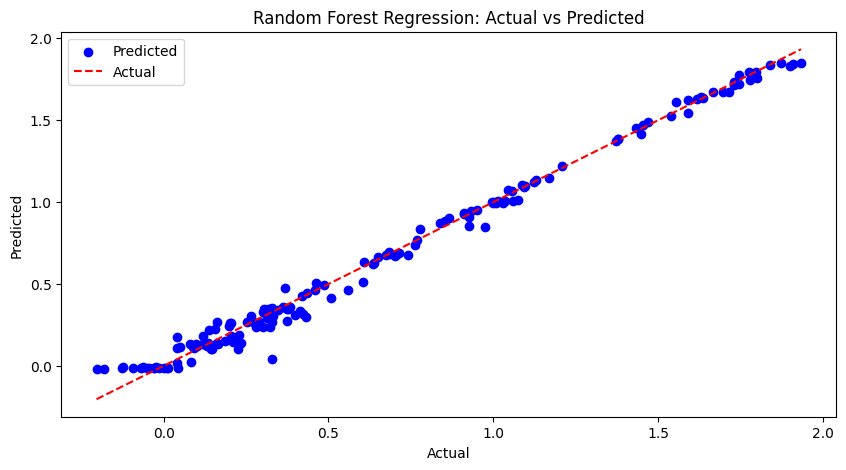

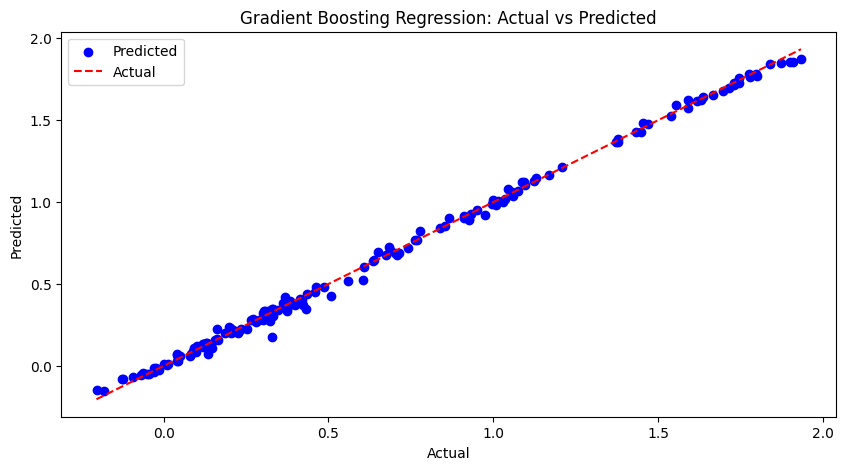

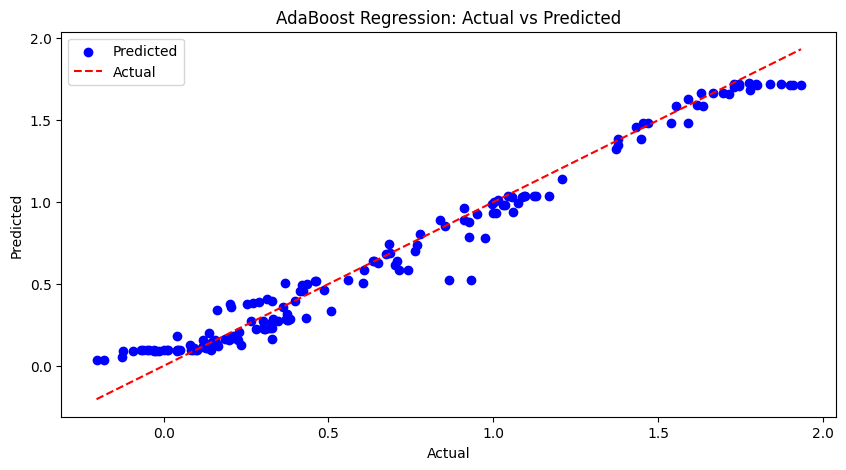

In [ ]:
import matplotlib.pyplot as plt

# Membuat plot perbandingan nilai aktual dengan nilai yang diprediksi oleh model Random Forest
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Membuat plot perbandingan nilai aktual dengan nilai yang diprediksi oleh model Gradient Boosting
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_gb, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Membuat plot perbandingan nilai aktual dengan nilai yang diprediksi oleh model AdaBoost
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_ab, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('AdaBoost Regression: Actual vs Predicted')
plt.legend()
plt.show()


Grafik  menunjukkan perbandingan antara nilai QoS aktual dan nilai QoS yang diprediksi oleh model Random Forest Regressor. Di sini, sumbu x menunjukkan nilai aktual QoS, sementara sumbu y menunjukkan nilai QoS yang diprediksi oleh model. Setiap titik biru mewakili prediksi untuk satu data pengujian tertentu.

Garis merah putus-putus adalah garis diagonal yang menunjukkan di mana nilai aktual dan nilai prediksi akan sama. Jika semua prediksi benar, titik-titik biru akan berada di sepanjang garis diagonal ini.

### 7.3.2. Hasil Model Klasifikasi

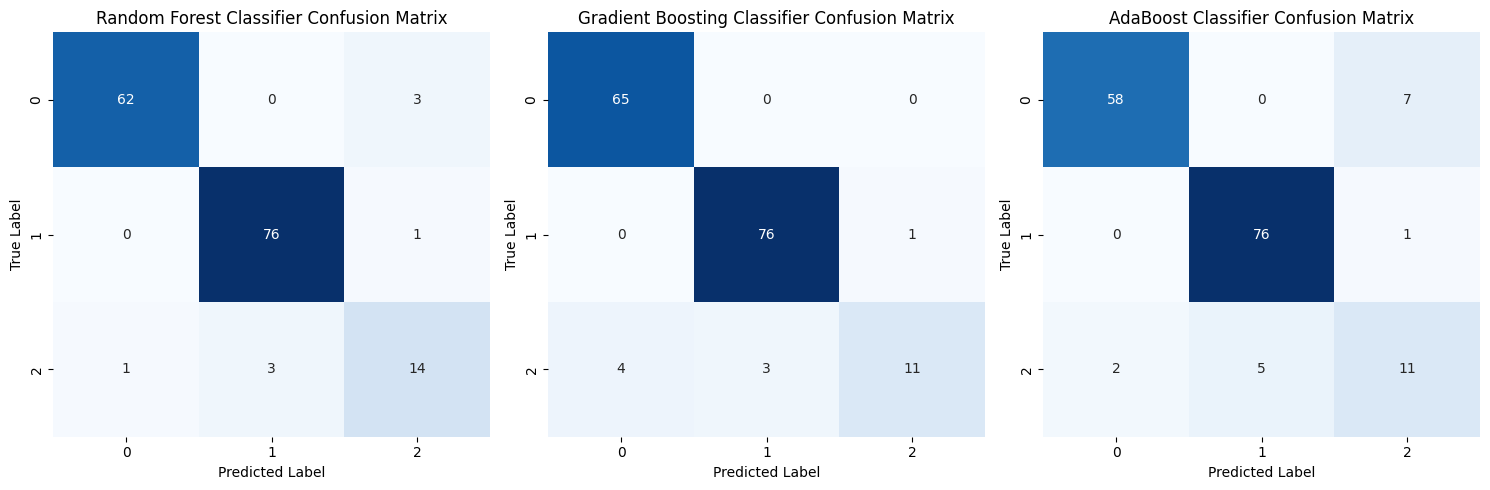

Random Forest Classifier:
              precision    recall  f1-score   support

        Baik       0.98      0.95      0.97        65
       Buruk       0.96      0.99      0.97        77
      Sedang       0.78      0.78      0.78        18

    accuracy                           0.95       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.95      0.95      0.95       160


Gradient Boosting Classifier:
              precision    recall  f1-score   support

        Baik       0.94      1.00      0.97        65
       Buruk       0.96      0.99      0.97        77
      Sedang       0.92      0.61      0.73        18

    accuracy                           0.95       160
   macro avg       0.94      0.87      0.89       160
weighted avg       0.95      0.95      0.95       160


AdaBoost Classifier:
              precision    recall  f1-score   support

        Baik       0.97      0.89      0.93        65
       Buruk       0.94      0.99      0.96       

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
class_report_gb = classification_report(y_test, y_pred_gb)
class_report_ab = classification_report(y_test, y_pred_ab)

# Visualisasi Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoost Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# Menampilkan Classification Report
print("Random Forest Classifier:")
print(class_report_rf)

print("\nGradient Boosting Classifier:")
print(class_report_gb)

print("\nAdaBoost Classifier:")
print(class_report_ab)